# **RUN ON GOOGLE COLABORATORY**

## Authenticate Bigquery

In [19]:
# Libraries
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

auth.authenticate_user()
project_id = "fazfahmi" # Change it with your project id
client = bigquery.Client(project=project_id)

How to get it

1. Open Bigquery Console
2. Click on `My Project ....`
3. Your project id is in `ID` column

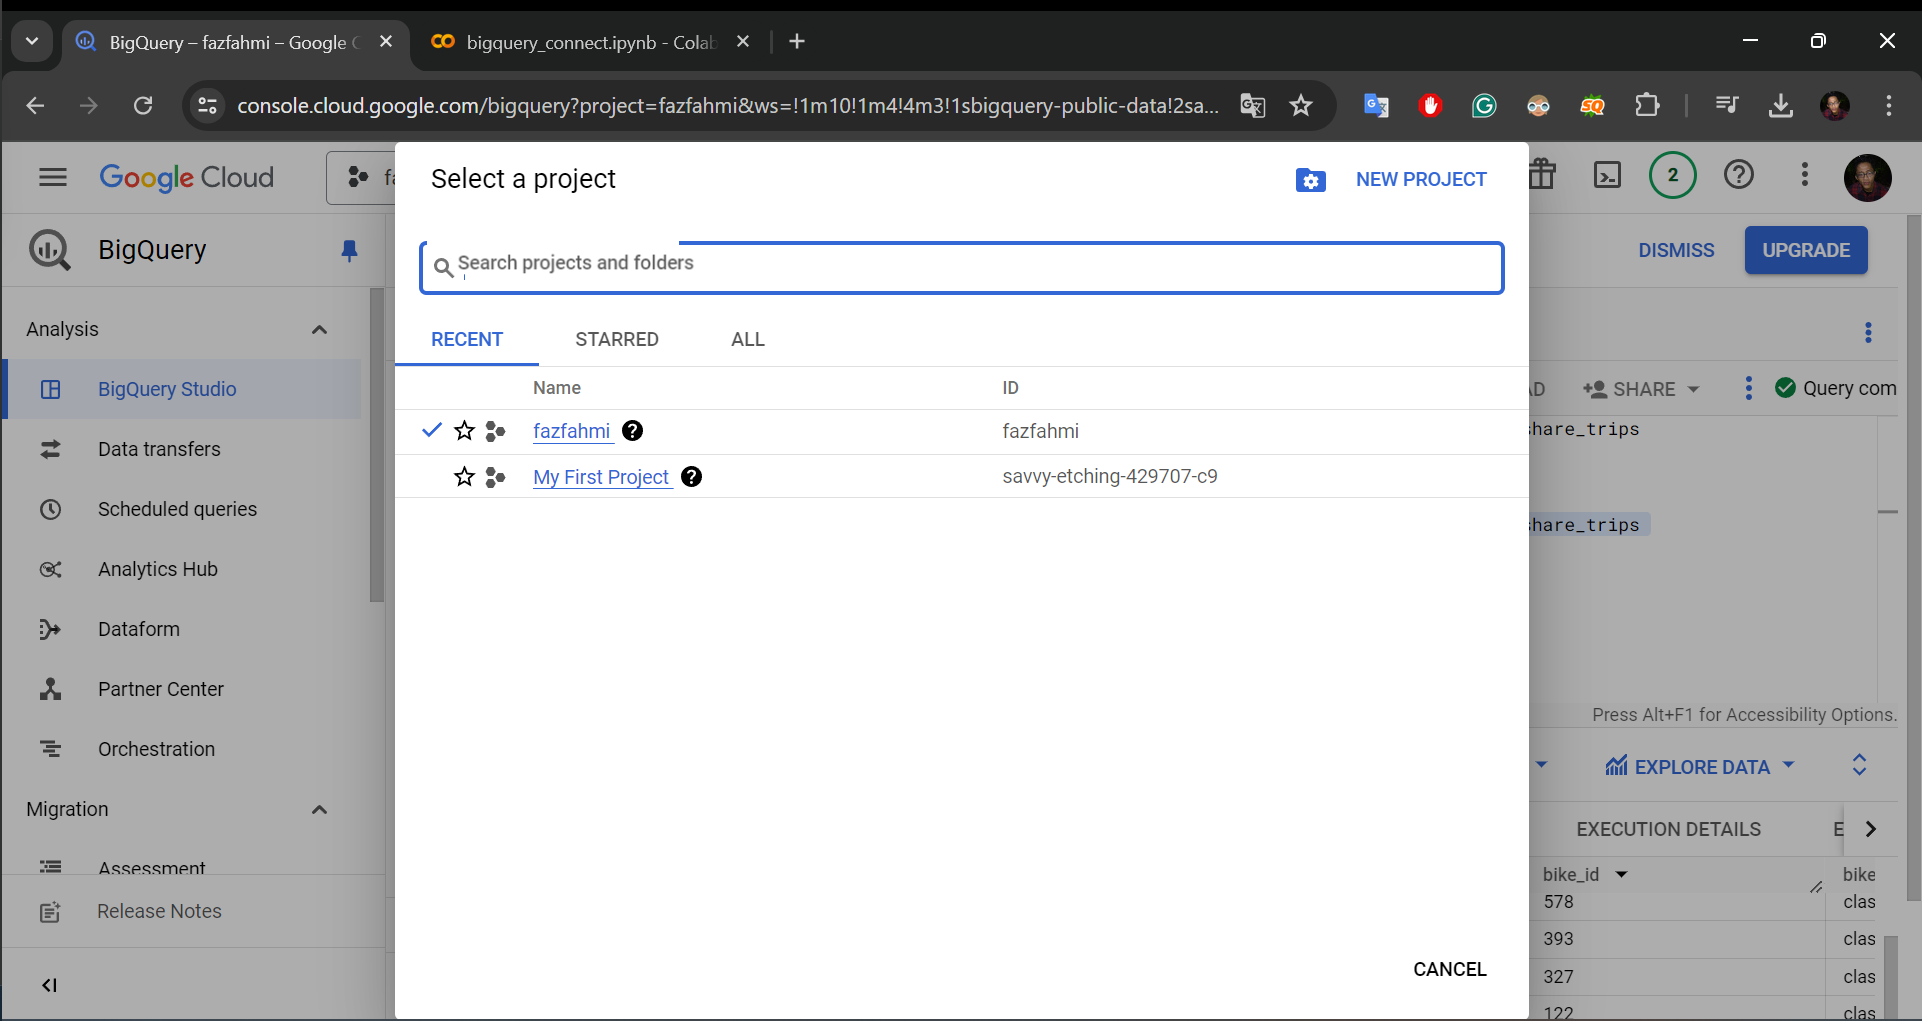![image.png](attachment:image.png)

my project id is `snappy-abode-394708`

yours must be different

## Putting Your Query

In [26]:
# Query SQL assign in `query variable
query = """
SELECT * FROM bigquery-public-data.austin_bikeshare.bikeshare_trips;"""

`bigquery-public-data`**.**`austin_bikeshare`**.**`bikeshare_trips`

meaning

***bikeshare_trips* `table`** belongs to austin_bikeshare dataset,

& ***austin_bikeshare* `dataset`** belongs to ***bigquery-public-data***

You can access it by:

1. Click on the table
2. Click on `DETAILS` tab
3. It would be in `Table ID`

Then you can copy it's id by hovering at the end of id and click on copy icon

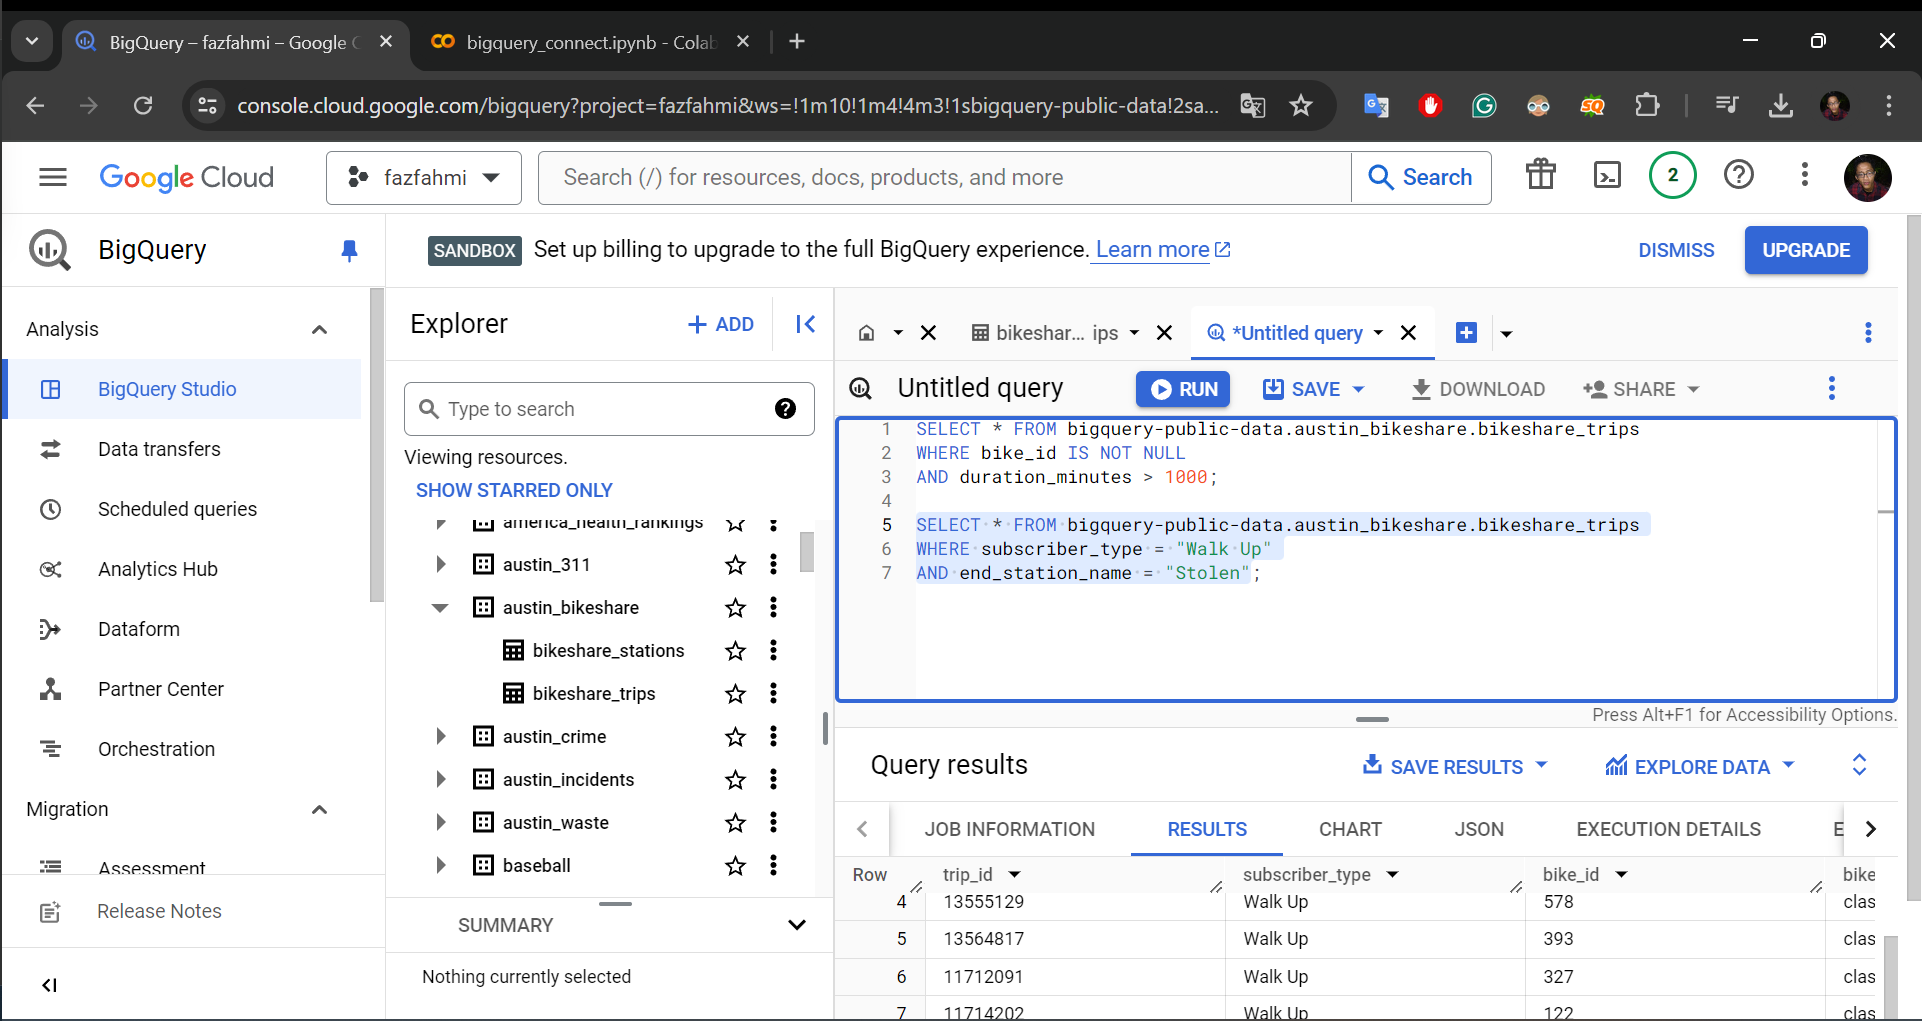

## Set Up Query

Then, 'query' variable would be passed to passed to client.query(query).to data_frame()

In [27]:
df = client.query(query).to_dataframe()

**`df`** is short from **`d`**`ata` **`f`**`rame`

and we save the data in the `df` varibale

you can change the variable as you like

In [28]:
# Try call it, to check the data

df

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,10748199,Weekender,765,classic,2016-07-02 09:55:23+00:00,3464,Pease Park,2569,East 11th St. & San Marcos,22
1,11192741,Weekender,775,classic,2016-07-31 09:33:06+00:00,1007,Lavaca & 6th,2569,East 11th St. & San Marcos,14
2,11155044,Local365,548,classic,2016-07-28 18:13:54+00:00,3291,11th & San Jacinto,2569,East 11th St. & San Marcos,5
3,10838622,Local365,220,classic,2016-07-07 18:09:14+00:00,3291,11th & San Jacinto,2569,East 11th St. & San Marcos,5
4,10972515,Walk Up,388,classic,2016-07-16 16:40:07+00:00,2569,East 11th St. & San Marcos,2569,East 11th St. & San Marcos,219
...,...,...,...,...,...,...,...,...,...,...
2145494,28613096,Student Membership,21810,electric,2022-12-09 14:32:50+00:00,7189,28th/Rio Grande,7189,28th/Rio Grande,48
2145495,28571390,Local31,22461,electric,2022-12-02 18:35:21+00:00,7189,28th/Rio Grande,7189,28th/Rio Grande,17
2145496,27119750,Explorer,21680,electric,2022-07-07 09:33:50+00:00,7189,28th/Rio,7189,28th/Rio,41
2145497,26800662,Local31,21704,electric,2022-05-31 08:04:01+00:00,7189,28th/Rio,7189,28th/Rio,16


# NGC 6

## How many tables are in the austin_bikeshare dataset?

In [53]:
client.query(
"""
SELECT COUNT(*)
    FROM `bigquery-public-data.austin_bikeshare.INFORMATION_SCHEMA.TABLES`;
"""
).to_dataframe()

,f0_
0,2


## How many columns in the bikeshare_stations table have STRING data?

In [68]:
client.query(
"""
SELECT table_name, COUNT(column_name) as column_count
    FROM `bigquery-public-data.austin_bikeshare.INFORMATION_SCHEMA.COLUMNS`
    WHERE table_name = 'bikeshare_stations' AND
    data_type = 'STRING'
    GROUP BY table_name;
"""
).to_dataframe()

,table_name,column_count
0,bikeshare_stations,7


## All trips where the bike_id is not null and the duration is greater than 1000 minutes

In [36]:
no3 =client.query(
"""
SELECT * FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
WHERE bike_id IS NOT NULL
AND duration_minutes > 1000;
"""
).to_dataframe()

In [40]:
# Prove that in 'bike_id' column there is no missing value
print(f"Missing value in 'bike_id' column is: (no3.isna().sum())")

Missing value in 'bike_id' column is: (no3.isna().sum())


In [43]:
# Prove that in 'duration_minutes' column greater than 1000 value
print(f"Minimum duraion in 'duration_minutes colomn is:{no3['duration_minutes'].min()} minutes.")

Minimum duraion in 'duration_minutes colomn is:1001 minutes.


## **Trips** where the `subscriber_type` is "Walk Up" and `the end_station_name`  is "Stolen"

In [46]:
query = """
SELECT * FROM bigquery-public-data.austin_bikeshare.bikeshare_trips
WHERE subscriber_type = "Walk Up"
AND end_station_name = "Stolen";"""

In [47]:
no4 = client.query(query).to_dataframe()

In [48]:
no4

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,16898448,Walk Up,1857,classic,2018-03-18 22:51:20+00:00,2501,5th & Bowie,None,Stolen,3806
1,16863172,Walk Up,1795,classic,2018-03-14 21:23:26+00:00,2542,Plaza Saltillo,None,Stolen,2529
2,17151360,Walk Up,1899,classic,2018-04-21 15:29:10+00:00,2563,Davis at Rainey Street,None,Stolen,4302
3,13555129,Walk Up,578,classic,2017-01-27 01:35:26+00:00,2498,Convention Center / 4th St. @ MetroRail,None,Stolen,5189
4,13564817,Walk Up,393,classic,2017-01-28 04:57:28+00:00,2561,State Capitol Visitors Garage @ San Jacinto & ...,None,Stolen,4833
5,11712091,Walk Up,327,classic,2016-09-02 06:37:15+00:00,2565,Trinity & 6th Street,None,Stolen,6118
6,11714202,Walk Up,122,classic,2016-09-02 09:00:56+00:00,2565,Trinity & 6th Street,None,Stolen,5974
7,13857913,Walk Up,135,classic,2017-02-26 14:32:45+00:00,2566,Pfluger Bridge @ W 2nd Street,None,Stolen,1404
